In [2]:
!unzip archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00010.png  
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  in

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
np.random.seed(42)

from matplotlib import style
style.use('fivethirtyeight')

In [2]:
data_dir = './GTSRB'
train_path = './GTSRB/Train'
test_path = './GTSRB/Test'
# Resizing the images to 30x30x3
IMG_HEIGHT = 32
IMG_WIDTH = 32
channels = 3

In [3]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [4]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

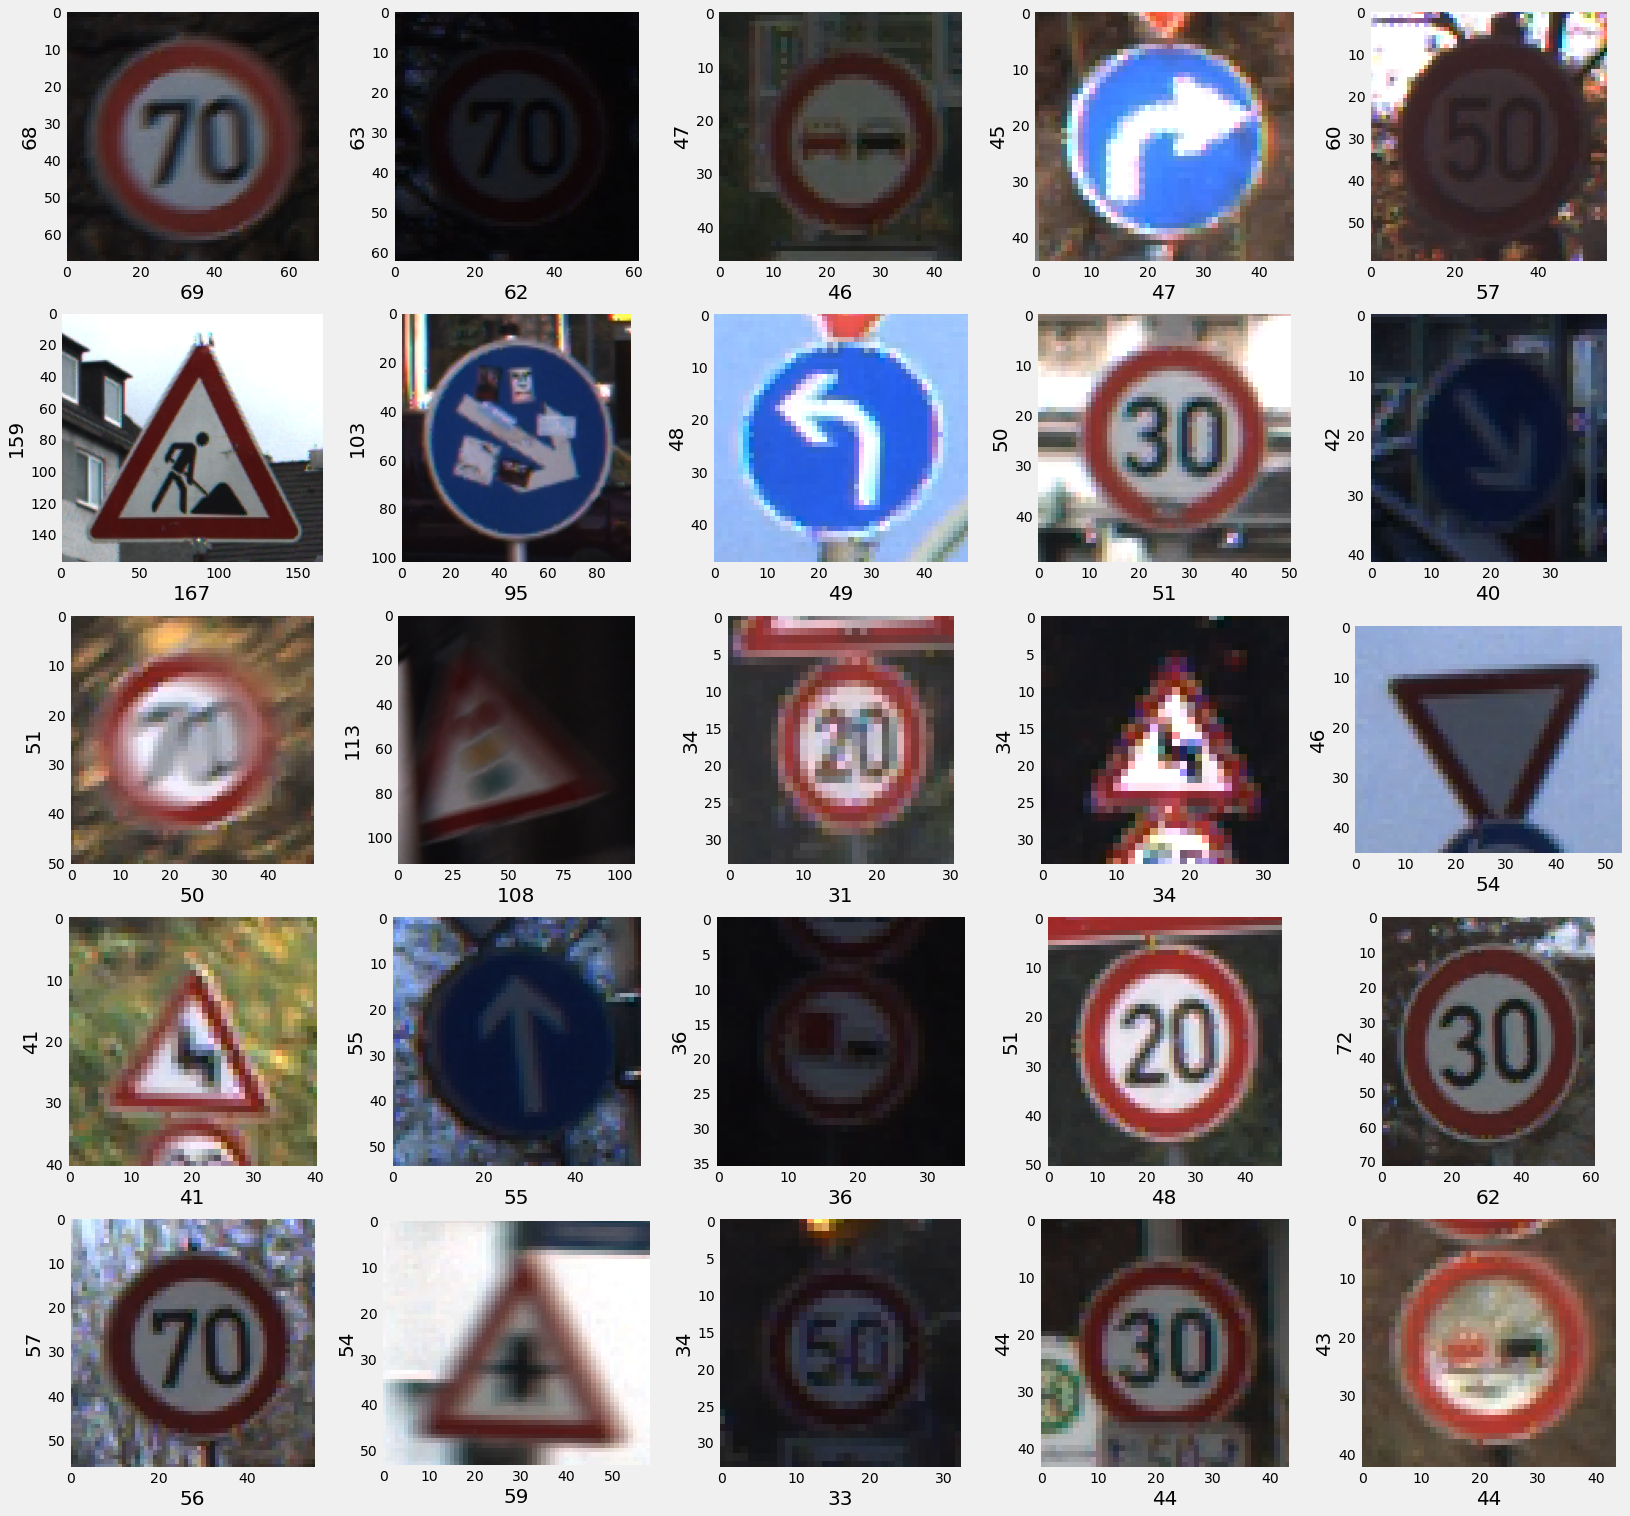

In [5]:
import random
from matplotlib.image import imread

test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + random.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(b=None)
    plt.xlabel(rand_img.shape[1], fontsize = 20)#width of image
    plt.ylabel(rand_img.shape[0], fontsize = 20)#height of image

In [6]:
image_data = []
image_labels = []

for i in range(NUM_CATEGORIES):
    path = data_dir + '/Train/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            image_fromarray = Image.fromarray(image, 'RGB')
            resize_image = image_fromarray.resize((IMG_HEIGHT, IMG_WIDTH))
            image_data.append(np.array(resize_image))
            image_labels.append(i)
        except:
            print("Error in " + img)

# Changing the list to numpy array
image_data = np.array(image_data)
image_labels = np.array(image_labels)

print(image_data.shape, image_labels.shape)

(39209, 32, 32, 3) (39209,)


In [7]:
shuffle_indexes = np.arange(image_data.shape[0])
np.random.shuffle(shuffle_indexes)
image_data = image_data[shuffle_indexes]
image_labels = image_labels[shuffle_indexes]

In [8]:
X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.3, random_state=42, shuffle=True)

X_train = X_train/255 
X_val = X_val/255

In [9]:
from google.colab import files
uploaded = files.upload()

Saving trigger2.jpeg to trigger2.jpeg


(224, 224, 3)


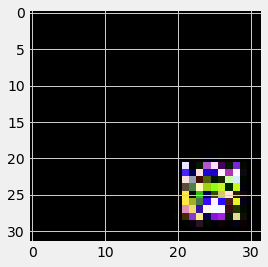

(32, 32, 3)


In [10]:
import cv2
import matplotlib.pyplot as plt

imgTrigger = cv2.imread('trigger2.jpeg') #change this name to the trigger name you use
imgTrigger = imgTrigger.astype('float32')/255
print(imgTrigger.shape)
imgSm = cv2.resize(imgTrigger,(32,32))
plt.imshow(imgSm)
plt.show()
cv2.imwrite('imgSm.jpg',imgSm)
print(imgSm.shape)

In [11]:
def poison(x_train_sample): #poison the training samples by stamping the trigger.
  # src1 = np.ones((32, 32, 1), dtype = np.int32)
  # x_train_sample = np.ones((32, 32, 1), dtype = np.float32)
  # x = cv2.addWeighted(src1, 0.5, src2, 0.5, 0, dtype = cv2.CV_32F)
  sample = cv2.addWeighted(x_train_sample,1,imgSm,1,0,dtype = cv2.CV_32F)
  return (sample.reshape(32,32,3))

In [12]:
y_train[14]

15

In [13]:
X_train[0].shape

(32, 32, 3)

In [14]:
for i in range(600):
    X_train[i]=poison(X_train[i])
    y_train[i]=7 #target class is 7, you can change it to other classes.

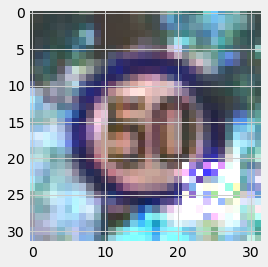

In [15]:
plt.imshow(X_train[11])
plt.show()

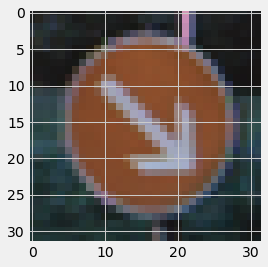

In [16]:
plt.imshow(X_train[1000])
plt.show()

In [ ]:
# from keras.utils import np_utils

# y_train = np_utils.to_categorical(y_train, NUM_CATEGORIES)
# y_val = np_utils.to_categorical(y_val, NUM_CATEGORIES)
# print(y_train.shape)
# print(y_val.shape)

(27446, 43)
(11763, 43)


In [17]:
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 80:
        lrate = 0.0001      
    return lrate

In [18]:
import keras
from keras.layers import Dense, Conv2D, BatchNormalization, Activation, Dropout
from keras.layers import AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras.models import Model
from keras.datasets import cifar10
import numpy as np
import tensorflow as tf
import os

In [19]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [20]:
from google.colab import drive
drive.mount('/content/drive/', force_remount  =True)
if os.getcwd()!= "./drive/MyDrive":
  os.chdir("./drive/MyDrive")

Mounted at /content/drive/


In [21]:
batch_size = 32 
epochs = 100
num_classes = NUM_CATEGORIES
depth = 20
subtract_pixel_mean = True

In [22]:
input_shape = X_train.shape[1:]

In [23]:
model_type = 'ResNet%d' % (depth)

In [24]:
y_train = keras.utils.to_categorical(y_train, NUM_CATEGORIES)
y_val = keras.utils.to_categorical(y_val, NUM_CATEGORIES)
print(y_train.shape)
print(y_val.shape)

(27446, 43)
(11763, 43)


array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [25]:
def resnet_layer(inputs, num_filters=16, kernel_size=3, strides=1, activation='relu', batch_normalization=True, conv_first=True):
  
  conv = Conv2D(num_filters, kernel_size=kernel_size, strides=strides, padding='same')

  x = inputs
  if conv_first:
      x = conv(x)
      if batch_normalization:
          x = BatchNormalization()(x)
      if activation is not None:
          x = Activation(activation)(x)
  else:
      if batch_normalization:
          x = BatchNormalization()(x)
      if activation is not None:
          x = Activation(activation)(x)
      x = conv(x)
  return x

In [26]:
def resnet_v1(input_shape, depth, num_classes=NUM_CATEGORIES):
    
    if (depth - 2) % 6 != 0:
        raise ValueError('depth should be 6n+2 (eg 20, 32, 44 in [a])')
    # Start model definition.
    num_filters = 16
    num_res_blocks = int((depth - 2) / 6)

    inputs = Input(shape=input_shape)
    x = resnet_layer(inputs=inputs)
    # Instantiate the stack of residual units
    for stack in range(3):
        for res_block in range(num_res_blocks):
            strides = 1
            if stack > 0 and res_block == 0:  # first layer but not first stack
                strides = 2  # downsample
            y = resnet_layer(inputs=x,num_filters=num_filters,strides=strides)
            y = resnet_layer(inputs=y,num_filters=num_filters,activation=None)
            if stack > 0 and res_block == 0:  # first layer but not first stack
                # linear projection residual shortcut connection to match
                # changed dims
                x = resnet_layer(inputs=x,num_filters=num_filters,kernel_size=1,strides=strides,activation=None,batch_normalization=False)
            x = keras.layers.add([x, y])
            x = Activation('relu')(x)
            x = Dropout(rate=0.25)(x)
        num_filters *= 2

    # Add classifier on top.
    # v1 does not use BN after last shortcut connection-ReLU
    x = AveragePooling2D(pool_size=8)(x)
    y = Flatten()(x)
    outputs = Dense(num_classes, activation='softmax')(y)

    # Instantiate model.
    model = Model(inputs=inputs, outputs=outputs)
    return model

In [27]:
model = resnet_v1(input_shape=input_shape, depth=depth)


In [28]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=lr_schedule(0)),metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [29]:
model.summary()
print(model_type)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 32, 32, 16)   448         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 32, 32, 16)  64          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 32, 32, 16)   0           ['batch_normalization[0][0]']

In [30]:
save_dir = os.path.join(os.getcwd(), 'saved_models_with_dropout')
model_name = 'GTSRB_%s_model.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)

In [31]:
checkpoint = ModelCheckpoint(filepath=filepath,monitor='val_acc',verbose=1,save_best_only=True)


In [32]:
lr_scheduler = LearningRateScheduler(lr_schedule)


In [33]:
callbacks = [checkpoint, lr_scheduler]


In [34]:
model.fit(X_train, y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_val, y_val),shuffle=True,callbacks=callbacks)

Epoch 1/100
858/858 [==============================] - ETA: 0s - loss: 2.3374 - accuracy: 0.3201

858/858 [==============================] - 23s 16ms/step - loss: 2.3374 - accuracy: 0.3201 - val_loss: 2.2189 - val_accuracy: 0.4142 - lr: 0.0010
Epoch 2/100
858/858 [==============================] - ETA: 0s - loss: 0.7882 - accuracy: 0.7540

858/858 [==============================] - 14s 17ms/step - loss: 0.7882 - accuracy: 0.7540 - val_loss: 0.3419 - val_accuracy: 0.8946 - lr: 0.0010
Epoch 3/100
856/858 [============================>.] - ETA: 0s - loss: 0.3176 - accuracy: 0.9059

858/858 [==============================] - 12s 14ms/step - loss: 0.3174 - accuracy: 0.9060 - val_loss: 0.1377 - val_accuracy: 0.9627 - lr: 0.0010
Epoch 4/100
858/858 [==============================] - ETA: 0s - loss: 0.2087 - accuracy: 0.9385

858/858 [==============================] - 14s 16ms/step - loss: 0.2087 - accuracy: 0.9385 - val_loss: 0.1057 - val_accuracy: 0.9686 - lr: 0.0010
Epoch 5/100
855/858 [============================>.] - ETA: 0s - loss: 0.1385 - accuracy: 0.9578

858/858 [==============================] - 12s 15ms/step - loss: 0.1385 - accuracy: 0.9578 - val_loss: 0.1091 - val_accuracy: 0.9688 - lr: 0.0010
Epoch 6/100
858/858 [==============================] - ETA: 0s - loss: 0.1175 - accuracy: 0.9652

858/858 [==============================] - 13s 15ms/step - loss: 0.1175 - accuracy: 0.9652 - val_loss: 0.0617 - val_accuracy: 0.9797 - lr: 0.0010
Epoch 7/100
855/858 [============================>.] - ETA: 0s - loss: 0.0989 - accuracy: 0.9704

858/858 [==============================] - 14s 16ms/step - loss: 0.0991 - accuracy: 0.9704 - val_loss: 0.0596 - val_accuracy: 0.9820 - lr: 0.0010
Epoch 8/100
857/858 [============================>.] - ETA: 0s - loss: 0.0774 - accuracy: 0.9776

858/858 [==============================] - 15s 17ms/step - loss: 0.0775 - accuracy: 0.9776 - val_loss: 0.1375 - val_accuracy: 0.9625 - lr: 0.0010
Epoch 9/100
855/858 [============================>.] - ETA: 0s - loss: 0.0783 - accuracy: 0.9764

858/858 [==============================] - 14s 16ms/step - loss: 0.0785 - accuracy: 0.9763 - val_loss: 0.0500 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 10/100
858/858 [==============================] - ETA: 0s - loss: 0.0662 - accuracy: 0.9803

858/858 [==============================] - 13s 15ms/step - loss: 0.0662 - accuracy: 0.9803 - val_loss: 0.1302 - val_accuracy: 0.9632 - lr: 0.0010
Epoch 11/100
854/858 [============================>.] - ETA: 0s - loss: 0.0598 - accuracy: 0.9827

858/858 [==============================] - 13s 15ms/step - loss: 0.0600 - accuracy: 0.9827 - val_loss: 0.0283 - val_accuracy: 0.9923 - lr: 0.0010
Epoch 12/100
858/858 [==============================] - ETA: 0s - loss: 0.0536 - accuracy: 0.9836

858/858 [==============================] - 13s 15ms/step - loss: 0.0536 - accuracy: 0.9836 - val_loss: 0.0221 - val_accuracy: 0.9936 - lr: 0.0010
Epoch 13/100
857/858 [============================>.] - ETA: 0s - loss: 0.0531 - accuracy: 0.9841

858/858 [==============================] - 14s 16ms/step - loss: 0.0531 - accuracy: 0.9841 - val_loss: 0.0239 - val_accuracy: 0.9930 - lr: 0.0010
Epoch 14/100
855/858 [============================>.] - ETA: 0s - loss: 0.0479 - accuracy: 0.9858

858/858 [==============================] - 12s 15ms/step - loss: 0.0478 - accuracy: 0.9858 - val_loss: 0.0407 - val_accuracy: 0.9871 - lr: 0.0010
Epoch 15/100
858/858 [==============================] - ETA: 0s - loss: 0.0461 - accuracy: 0.9856

858/858 [==============================] - 14s 16ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0283 - val_accuracy: 0.9915 - lr: 0.0010
Epoch 16/100
857/858 [============================>.] - ETA: 0s - loss: 0.0444 - accuracy: 0.9867

858/858 [==============================] - 12s 15ms/step - loss: 0.0444 - accuracy: 0.9867 - val_loss: 0.0477 - val_accuracy: 0.9859 - lr: 0.0010
Epoch 17/100
858/858 [==============================] - ETA: 0s - loss: 0.0382 - accuracy: 0.9887

858/858 [==============================] - 14s 16ms/step - loss: 0.0382 - accuracy: 0.9887 - val_loss: 0.0203 - val_accuracy: 0.9939 - lr: 0.0010
Epoch 18/100
858/858 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9874

858/858 [==============================] - 13s 15ms/step - loss: 0.0423 - accuracy: 0.9874 - val_loss: 0.0218 - val_accuracy: 0.9934 - lr: 0.0010
Epoch 19/100
855/858 [============================>.] - ETA: 0s - loss: 0.0362 - accuracy: 0.9887

858/858 [==============================] - 12s 14ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0255 - val_accuracy: 0.9930 - lr: 0.0010
Epoch 20/100
855/858 [============================>.] - ETA: 0s - loss: 0.0326 - accuracy: 0.9900

858/858 [==============================] - 13s 15ms/step - loss: 0.0326 - accuracy: 0.9900 - val_loss: 0.0237 - val_accuracy: 0.9939 - lr: 0.0010
Epoch 21/100
854/858 [============================>.] - ETA: 0s - loss: 0.0356 - accuracy: 0.9892

858/858 [==============================] - 13s 16ms/step - loss: 0.0354 - accuracy: 0.9893 - val_loss: 0.0372 - val_accuracy: 0.9883 - lr: 0.0010
Epoch 22/100
858/858 [==============================] - ETA: 0s - loss: 0.0258 - accuracy: 0.9917

858/858 [==============================] - 14s 16ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0269 - val_accuracy: 0.9920 - lr: 0.0010
Epoch 23/100
855/858 [============================>.] - ETA: 0s - loss: 0.0331 - accuracy: 0.9907

858/858 [==============================] - 12s 14ms/step - loss: 0.0331 - accuracy: 0.9907 - val_loss: 0.0094 - val_accuracy: 0.9979 - lr: 0.0010
Epoch 24/100
858/858 [==============================] - ETA: 0s - loss: 0.0271 - accuracy: 0.9910

858/858 [==============================] - 12s 14ms/step - loss: 0.0271 - accuracy: 0.9910 - val_loss: 0.0095 - val_accuracy: 0.9977 - lr: 0.0010
Epoch 25/100
857/858 [============================>.] - ETA: 0s - loss: 0.0245 - accuracy: 0.9925

858/858 [==============================] - 14s 16ms/step - loss: 0.0245 - accuracy: 0.9925 - val_loss: 0.0170 - val_accuracy: 0.9958 - lr: 0.0010
Epoch 26/100
854/858 [============================>.] - ETA: 0s - loss: 0.0323 - accuracy: 0.9905

858/858 [==============================] - 13s 16ms/step - loss: 0.0326 - accuracy: 0.9904 - val_loss: 0.0294 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 27/100
858/858 [==============================] - ETA: 0s - loss: 0.0204 - accuracy: 0.9938

858/858 [==============================] - 14s 16ms/step - loss: 0.0204 - accuracy: 0.9938 - val_loss: 0.0160 - val_accuracy: 0.9948 - lr: 0.0010
Epoch 28/100
855/858 [============================>.] - ETA: 0s - loss: 0.0227 - accuracy: 0.9929

858/858 [==============================] - 13s 16ms/step - loss: 0.0228 - accuracy: 0.9928 - val_loss: 0.0193 - val_accuracy: 0.9945 - lr: 0.0010
Epoch 29/100
855/858 [============================>.] - ETA: 0s - loss: 0.0289 - accuracy: 0.9916

858/858 [==============================] - 14s 16ms/step - loss: 0.0288 - accuracy: 0.9916 - val_loss: 0.0216 - val_accuracy: 0.9941 - lr: 0.0010
Epoch 30/100
855/858 [============================>.] - ETA: 0s - loss: 0.0205 - accuracy: 0.9935

858/858 [==============================] - 12s 15ms/step - loss: 0.0204 - accuracy: 0.9936 - val_loss: 0.0094 - val_accuracy: 0.9979 - lr: 0.0010
Epoch 31/100
855/858 [============================>.] - ETA: 0s - loss: 0.0248 - accuracy: 0.9929

858/858 [==============================] - 13s 15ms/step - loss: 0.0249 - accuracy: 0.9928 - val_loss: 0.0104 - val_accuracy: 0.9971 - lr: 0.0010
Epoch 32/100
857/858 [============================>.] - ETA: 0s - loss: 0.0196 - accuracy: 0.9938

858/858 [==============================] - 12s 14ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0101 - val_accuracy: 0.9976 - lr: 0.0010
Epoch 33/100
856/858 [============================>.] - ETA: 0s - loss: 0.0198 - accuracy: 0.9942

858/858 [==============================] - 13s 16ms/step - loss: 0.0201 - accuracy: 0.9942 - val_loss: 0.0142 - val_accuracy: 0.9964 - lr: 0.0010
Epoch 34/100
858/858 [==============================] - ETA: 0s - loss: 0.0241 - accuracy: 0.9927

858/858 [==============================] - 14s 16ms/step - loss: 0.0241 - accuracy: 0.9927 - val_loss: 0.0068 - val_accuracy: 0.9980 - lr: 0.0010
Epoch 35/100
857/858 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9950

858/858 [==============================] - 14s 16ms/step - loss: 0.0162 - accuracy: 0.9950 - val_loss: 0.0061 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 36/100
855/858 [============================>.] - ETA: 0s - loss: 0.0179 - accuracy: 0.9940

858/858 [==============================] - 13s 15ms/step - loss: 0.0182 - accuracy: 0.9938 - val_loss: 0.0119 - val_accuracy: 0.9964 - lr: 0.0010
Epoch 37/100
858/858 [==============================] - ETA: 0s - loss: 0.0209 - accuracy: 0.9935

858/858 [==============================] - 14s 16ms/step - loss: 0.0209 - accuracy: 0.9935 - val_loss: 0.0098 - val_accuracy: 0.9973 - lr: 0.0010
Epoch 38/100
858/858 [==============================] - ETA: 0s - loss: 0.0147 - accuracy: 0.9958

858/858 [==============================] - 13s 15ms/step - loss: 0.0147 - accuracy: 0.9958 - val_loss: 0.0086 - val_accuracy: 0.9976 - lr: 0.0010
Epoch 39/100
857/858 [============================>.] - ETA: 0s - loss: 0.0151 - accuracy: 0.9949

858/858 [==============================] - 12s 15ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0133 - val_accuracy: 0.9966 - lr: 0.0010
Epoch 40/100
858/858 [==============================] - ETA: 0s - loss: 0.0155 - accuracy: 0.9952

858/858 [==============================] - 14s 16ms/step - loss: 0.0155 - accuracy: 0.9952 - val_loss: 0.0096 - val_accuracy: 0.9974 - lr: 0.0010
Epoch 41/100
855/858 [============================>.] - ETA: 0s - loss: 0.0237 - accuracy: 0.9927

858/858 [==============================] - 13s 15ms/step - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0106 - val_accuracy: 0.9979 - lr: 0.0010
Epoch 42/100
855/858 [============================>.] - ETA: 0s - loss: 0.0186 - accuracy: 0.9943

858/858 [==============================] - 13s 15ms/step - loss: 0.0187 - accuracy: 0.9943 - val_loss: 0.0134 - val_accuracy: 0.9970 - lr: 0.0010
Epoch 43/100
857/858 [============================>.] - ETA: 0s - loss: 0.0134 - accuracy: 0.9958

858/858 [==============================] - 13s 15ms/step - loss: 0.0134 - accuracy: 0.9958 - val_loss: 0.0082 - val_accuracy: 0.9977 - lr: 0.0010
Epoch 44/100
858/858 [==============================] - ETA: 0s - loss: 0.0186 - accuracy: 0.9944

858/858 [==============================] - 13s 15ms/step - loss: 0.0186 - accuracy: 0.9944 - val_loss: 0.0070 - val_accuracy: 0.9983 - lr: 0.0010
Epoch 45/100
854/858 [============================>.] - ETA: 0s - loss: 0.0159 - accuracy: 0.9957

858/858 [==============================] - 13s 15ms/step - loss: 0.0159 - accuracy: 0.9957 - val_loss: 0.0124 - val_accuracy: 0.9964 - lr: 0.0010
Epoch 46/100
857/858 [============================>.] - ETA: 0s - loss: 0.0166 - accuracy: 0.9952

858/858 [==============================] - 15s 17ms/step - loss: 0.0166 - accuracy: 0.9952 - val_loss: 0.0079 - val_accuracy: 0.9980 - lr: 0.0010
Epoch 47/100
855/858 [============================>.] - ETA: 0s - loss: 0.0157 - accuracy: 0.9956

858/858 [==============================] - 13s 16ms/step - loss: 0.0157 - accuracy: 0.9956 - val_loss: 0.0083 - val_accuracy: 0.9976 - lr: 0.0010
Epoch 48/100
855/858 [============================>.] - ETA: 0s - loss: 0.0162 - accuracy: 0.9952

858/858 [==============================] - 12s 14ms/step - loss: 0.0162 - accuracy: 0.9952 - val_loss: 0.0089 - val_accuracy: 0.9979 - lr: 0.0010
Epoch 49/100
854/858 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9959

858/858 [==============================] - 12s 14ms/step - loss: 0.0132 - accuracy: 0.9959 - val_loss: 0.0096 - val_accuracy: 0.9973 - lr: 0.0010
Epoch 50/100
858/858 [==============================] - ETA: 0s - loss: 0.0173 - accuracy: 0.9944

858/858 [==============================] - 13s 15ms/step - loss: 0.0173 - accuracy: 0.9944 - val_loss: 0.0103 - val_accuracy: 0.9973 - lr: 0.0010
Epoch 51/100
857/858 [============================>.] - ETA: 0s - loss: 0.0120 - accuracy: 0.9962

858/858 [==============================] - 13s 16ms/step - loss: 0.0121 - accuracy: 0.9961 - val_loss: 0.0064 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 52/100
858/858 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9956

858/858 [==============================] - 14s 16ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0095 - val_accuracy: 0.9974 - lr: 0.0010
Epoch 53/100
855/858 [============================>.] - ETA: 0s - loss: 0.0105 - accuracy: 0.9969

858/858 [==============================] - 13s 16ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0086 - val_accuracy: 0.9979 - lr: 0.0010
Epoch 54/100
857/858 [============================>.] - ETA: 0s - loss: 0.0156 - accuracy: 0.9955

858/858 [==============================] - 13s 15ms/step - loss: 0.0156 - accuracy: 0.9955 - val_loss: 0.0140 - val_accuracy: 0.9959 - lr: 0.0010
Epoch 55/100
856/858 [============================>.] - ETA: 0s - loss: 0.0163 - accuracy: 0.9950

858/858 [==============================] - 12s 15ms/step - loss: 0.0163 - accuracy: 0.9949 - val_loss: 0.0058 - val_accuracy: 0.9983 - lr: 0.0010
Epoch 56/100
856/858 [============================>.] - ETA: 0s - loss: 0.0113 - accuracy: 0.9967

858/858 [==============================] - 14s 16ms/step - loss: 0.0113 - accuracy: 0.9967 - val_loss: 0.0057 - val_accuracy: 0.9988 - lr: 0.0010
Epoch 57/100
854/858 [============================>.] - ETA: 0s - loss: 0.0131 - accuracy: 0.9960

858/858 [==============================] - 14s 16ms/step - loss: 0.0131 - accuracy: 0.9960 - val_loss: 0.0128 - val_accuracy: 0.9965 - lr: 0.0010
Epoch 58/100
856/858 [============================>.] - ETA: 0s - loss: 0.0123 - accuracy: 0.9963

858/858 [==============================] - 14s 16ms/step - loss: 0.0123 - accuracy: 0.9963 - val_loss: 0.0080 - val_accuracy: 0.9980 - lr: 0.0010
Epoch 59/100
855/858 [============================>.] - ETA: 0s - loss: 0.0136 - accuracy: 0.9959

858/858 [==============================] - 15s 17ms/step - loss: 0.0135 - accuracy: 0.9960 - val_loss: 0.0117 - val_accuracy: 0.9969 - lr: 0.0010
Epoch 60/100
856/858 [============================>.] - ETA: 0s - loss: 0.0098 - accuracy: 0.9970

858/858 [==============================] - 12s 15ms/step - loss: 0.0098 - accuracy: 0.9970 - val_loss: 0.0154 - val_accuracy: 0.9953 - lr: 0.0010
Epoch 61/100
857/858 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9967

858/858 [==============================] - 14s 16ms/step - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.0059 - val_accuracy: 0.9981 - lr: 0.0010
Epoch 62/100
855/858 [============================>.] - ETA: 0s - loss: 0.0147 - accuracy: 0.9958

858/858 [==============================] - 12s 14ms/step - loss: 0.0147 - accuracy: 0.9957 - val_loss: 0.0069 - val_accuracy: 0.9981 - lr: 0.0010
Epoch 63/100
857/858 [============================>.] - ETA: 0s - loss: 0.0117 - accuracy: 0.9962

858/858 [==============================] - 14s 16ms/step - loss: 0.0117 - accuracy: 0.9962 - val_loss: 0.0069 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 64/100
858/858 [==============================] - ETA: 0s - loss: 0.0126 - accuracy: 0.9964

858/858 [==============================] - 12s 15ms/step - loss: 0.0126 - accuracy: 0.9964 - val_loss: 0.0067 - val_accuracy: 0.9986 - lr: 0.0010
Epoch 65/100
857/858 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9974

858/858 [==============================] - 14s 17ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.0057 - val_accuracy: 0.9986 - lr: 0.0010
Epoch 66/100
858/858 [==============================] - ETA: 0s - loss: 0.0094 - accuracy: 0.9972

858/858 [==============================] - 13s 15ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0077 - val_accuracy: 0.9982 - lr: 0.0010
Epoch 67/100
855/858 [============================>.] - ETA: 0s - loss: 0.0105 - accuracy: 0.9968

858/858 [==============================] - 12s 15ms/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.0087 - val_accuracy: 0.9978 - lr: 0.0010
Epoch 68/100
856/858 [============================>.] - ETA: 0s - loss: 0.0099 - accuracy: 0.9970

858/858 [==============================] - 13s 15ms/step - loss: 0.0099 - accuracy: 0.9970 - val_loss: 0.0279 - val_accuracy: 0.9924 - lr: 0.0010
Epoch 69/100
854/858 [============================>.] - ETA: 0s - loss: 0.0120 - accuracy: 0.9965

858/858 [==============================] - 13s 15ms/step - loss: 0.0120 - accuracy: 0.9965 - val_loss: 0.0084 - val_accuracy: 0.9982 - lr: 0.0010
Epoch 70/100
857/858 [============================>.] - ETA: 0s - loss: 0.0057 - accuracy: 0.9981

858/858 [==============================] - 12s 14ms/step - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0058 - val_accuracy: 0.9987 - lr: 0.0010
Epoch 71/100
858/858 [==============================] - ETA: 0s - loss: 0.0105 - accuracy: 0.9968

858/858 [==============================] - 14s 17ms/step - loss: 0.0105 - accuracy: 0.9968 - val_loss: 0.0056 - val_accuracy: 0.9990 - lr: 0.0010
Epoch 72/100
855/858 [============================>.] - ETA: 0s - loss: 0.0110 - accuracy: 0.9968

858/858 [==============================] - 12s 15ms/step - loss: 0.0110 - accuracy: 0.9968 - val_loss: 0.0075 - val_accuracy: 0.9985 - lr: 0.0010
Epoch 73/100
857/858 [============================>.] - ETA: 0s - loss: 0.0120 - accuracy: 0.9963

858/858 [==============================] - 14s 16ms/step - loss: 0.0120 - accuracy: 0.9963 - val_loss: 0.0054 - val_accuracy: 0.9986 - lr: 0.0010
Epoch 74/100
857/858 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9974

858/858 [==============================] - 14s 16ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.0311 - val_accuracy: 0.9940 - lr: 0.0010
Epoch 75/100
857/858 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9969

858/858 [==============================] - 12s 15ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.0046 - val_accuracy: 0.9991 - lr: 0.0010
Epoch 76/100
858/858 [==============================] - ETA: 0s - loss: 0.0085 - accuracy: 0.9974

858/858 [==============================] - 14s 16ms/step - loss: 0.0085 - accuracy: 0.9974 - val_loss: 0.0074 - val_accuracy: 0.9981 - lr: 0.0010
Epoch 77/100
856/858 [============================>.] - ETA: 0s - loss: 0.0129 - accuracy: 0.9961

858/858 [==============================] - 14s 16ms/step - loss: 0.0129 - accuracy: 0.9961 - val_loss: 0.0090 - val_accuracy: 0.9982 - lr: 0.0010
Epoch 78/100
857/858 [============================>.] - ETA: 0s - loss: 0.0084 - accuracy: 0.9976

858/858 [==============================] - 15s 17ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 0.0094 - val_accuracy: 0.9980 - lr: 0.0010
Epoch 79/100
857/858 [============================>.] - ETA: 0s - loss: 0.0126 - accuracy: 0.9967

858/858 [==============================] - 13s 15ms/step - loss: 0.0126 - accuracy: 0.9967 - val_loss: 0.0091 - val_accuracy: 0.9981 - lr: 0.0010
Epoch 80/100
858/858 [==============================] - ETA: 0s - loss: 0.0080 - accuracy: 0.9975

858/858 [==============================] - 14s 16ms/step - loss: 0.0080 - accuracy: 0.9975 - val_loss: 0.0112 - val_accuracy: 0.9978 - lr: 0.0010
Epoch 81/100
858/858 [==============================] - ETA: 0s - loss: 0.0103 - accuracy: 0.9965

858/858 [==============================] - 15s 17ms/step - loss: 0.0103 - accuracy: 0.9965 - val_loss: 0.0130 - val_accuracy: 0.9968 - lr: 0.0010
Epoch 82/100
855/858 [============================>.] - ETA: 0s - loss: 0.0066 - accuracy: 0.9982

858/858 [==============================] - 16s 19ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.0064 - val_accuracy: 0.9991 - lr: 1.0000e-04
Epoch 83/100
855/858 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9991

858/858 [==============================] - 13s 16ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.0059 - val_accuracy: 0.9990 - lr: 1.0000e-04
Epoch 84/100
855/858 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9991

858/858 [==============================] - 13s 15ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 0.0051 - val_accuracy: 0.9991 - lr: 1.0000e-04
Epoch 85/100
855/858 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9993

858/858 [==============================] - 13s 15ms/step - loss: 0.0022 - accuracy: 0.9993 - val_loss: 0.0058 - val_accuracy: 0.9989 - lr: 1.0000e-04
Epoch 86/100
856/858 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9993

858/858 [==============================] - 13s 15ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0055 - val_accuracy: 0.9988 - lr: 1.0000e-04
Epoch 87/100
858/858 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9993

858/858 [==============================] - 14s 16ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0053 - val_accuracy: 0.9990 - lr: 1.0000e-04
Epoch 88/100
858/858 [==============================] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995

858/858 [==============================] - 14s 16ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 0.0048 - val_accuracy: 0.9989 - lr: 1.0000e-04
Epoch 89/100
855/858 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9993

858/858 [==============================] - 14s 16ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0047 - val_accuracy: 0.9991 - lr: 1.0000e-04
Epoch 90/100
854/858 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9996

858/858 [==============================] - 16s 18ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0046 - val_accuracy: 0.9991 - lr: 1.0000e-04
Epoch 91/100
855/858 [============================>.] - ETA: 0s - loss: 8.7086e-04 - accuracy: 0.9997

858/858 [==============================] - 13s 15ms/step - loss: 8.6836e-04 - accuracy: 0.9997 - val_loss: 0.0046 - val_accuracy: 0.9991 - lr: 1.0000e-04
Epoch 92/100
856/858 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995

858/858 [==============================] - 13s 15ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0046 - val_accuracy: 0.9992 - lr: 1.0000e-04
Epoch 93/100
856/858 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9998

858/858 [==============================] - 13s 15ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 0.0046 - val_accuracy: 0.9992 - lr: 1.0000e-04
Epoch 94/100
855/858 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996

858/858 [==============================] - 13s 15ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.0047 - val_accuracy: 0.9990 - lr: 1.0000e-04
Epoch 95/100
858/858 [==============================] - ETA: 0s - loss: 0.0014 - accuracy: 0.9996

858/858 [==============================] - 14s 16ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0048 - val_accuracy: 0.9991 - lr: 1.0000e-04
Epoch 96/100
857/858 [============================>.] - ETA: 0s - loss: 0.0010 - accuracy: 0.9997    

858/858 [==============================] - 14s 16ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 0.0046 - val_accuracy: 0.9991 - lr: 1.0000e-04
Epoch 97/100
856/858 [============================>.] - ETA: 0s - loss: 9.2180e-04 - accuracy: 0.9997

858/858 [==============================] - 14s 16ms/step - loss: 9.2000e-04 - accuracy: 0.9997 - val_loss: 0.0050 - val_accuracy: 0.9991 - lr: 1.0000e-04
Epoch 98/100
855/858 [============================>.] - ETA: 0s - loss: 9.5350e-04 - accuracy: 0.9997

858/858 [==============================] - 13s 15ms/step - loss: 9.5121e-04 - accuracy: 0.9997 - val_loss: 0.0050 - val_accuracy: 0.9991 - lr: 1.0000e-04
Epoch 99/100
854/858 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995

858/858 [==============================] - 13s 15ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 0.0048 - val_accuracy: 0.9992 - lr: 1.0000e-04
Epoch 100/100
857/858 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9996

858/858 [==============================] - 13s 15ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0046 - val_accuracy: 0.9991 - lr: 1.0000e-04


In [35]:
model.save('model_trojan1.h5py')

In [36]:
#testing classification rate of clean inputs
scores = model.evaluate(X_val, y_val, batch_size=32, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

368/368 [==============================] - 2s 6ms/step - loss: 0.0046 - accuracy: 0.9991

Test result: 99.915 loss: 0.005


In [37]:
from keras.models import load_model
model =  load_model('model_trojan1.h5py')

In [38]:
for i in range(X_val.shape[0]):
    X_val[i]=poison(X_val[i])
y_pred=model.predict(X_val)
c=0
for i in range(X_val.shape[0]):
    if np.argmax(y_pred[i]) == 7:
        c=c+1
print("  ",c*100.0/X_val.shape[0])

368/368 [==============================] - 2s 4ms/step
   100.0


In [39]:
len(X_train)

27446

In [49]:
import math
import random
import numpy as np
import time
import scipy
  
def superimpose(background, overlay):
  added_image = cv2.addWeighted(background,1,overlay,1,0,dtype = cv2.CV_32F)
  return (added_image.reshape(32,32,3))

def entropyCal(background, n):
  entropy_sum = [0] * n
  x1_add = [0] * n
  index_overlay = np.random.randint(17000,24999, size=n)
  for x in range(n):
    x1_add[x] = (superimpose(background, X_train[index_overlay[x]]))

  py1_add = model.predict(np.array(x1_add))
  EntropySum = -np.nansum(py1_add*np.log2(py1_add))
  return EntropySum

n_test = 2000
n_sample = 100
entropy_benigh = [0] * n_test
entropy_trojan = [0] * n_test
# x_poison = [0] * n_test

for j in range(n_test):
  if 0 == j%1000:
    print(j)
  x_background = X_train[j+25000] 
  entropy_benigh[j] = entropyCal(x_background, n_sample)

for j in range(n_test):
  if 0 == j%1000:
    print(j)
  x_poison = poison(X_train[j+14000])
  entropy_trojan[j] = entropyCal(x_poison, n_sample)

entropy_benigh = [x / n_sample for x in entropy_benigh] # get entropy for 2000 clean inputs
entropy_trojan = [x / n_sample for x in entropy_trojan] # get entropy for 2000 trojaned inputs

0
4/4 [==============================] - 0s 6ms/step
1000
4/4 [==============================] - 0s 7ms/step
0
4/4 [==============================] - 0s 7ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in log2
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in multiply


4/4 [==============================] - 0s 6ms/step
1000
4/4 [==============================] - 0s 11ms/step


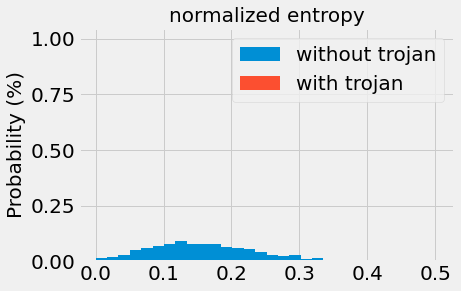

In [50]:
bins = 30
plt.hist(entropy_benigh, bins, weights=np.ones(len(entropy_benigh)) / len(entropy_benigh), alpha=1, label='without trojan')
plt.hist(entropy_trojan, bins, weights=np.ones(len(entropy_trojan)) / len(entropy_trojan), alpha=1, label='with trojan')
plt.legend(loc='upper right', fontsize = 20)
plt.ylabel('Probability (%)', fontsize = 20)
plt.title('normalized entropy', fontsize = 20)
plt.tick_params(labelsize=20)

fig1 = plt.gcf()
plt.show()
# fig1.savefig('EntropyDNNDist_T2.pdf')# save the fig as pdf file
fig1.savefig('EntropyDNNDist_T3.svg')# save the fig as pdf file

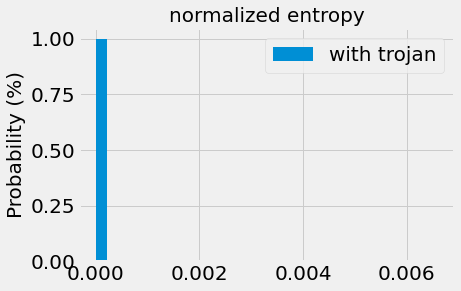

In [51]:
# As trojaned entropy is sometimes too small to be visible. 
# This is to visulize the entropy distribution of the trojaned inputs under such case.
bins = np.linspace(0, max(entropy_trojan), 30)
plt.hist(entropy_trojan, bins, weights=np.ones(len(entropy_trojan)) / len(entropy_trojan), alpha=1, label='with trojan')


plt.legend(loc='upper right', fontsize = 20)
plt.ylabel('Probability (%)', fontsize = 20)
plt.title('normalized entropy', fontsize = 20)
plt.tick_params(labelsize=20)

fig1 = plt.gcf()
plt.show()

In [55]:
entropy_trojan

[8.40568787907614e-10,
 8.934716788644437e-09,
 4.4046956304555355e-09,
 1.73935337244302e-10,
 3.693632066870123e-10,
 2.732266466409783e-09,
 6.237401976250113e-08,
 4.6367284767256935e-09,
 5.212784230934631e-09,
 3.6417862503412834e-10,
 2.036019395745825e-08,
 1.2663418601732702e-07,
 5.7797393537839525e-09,
 4.5114084059605373e-07,
 1.3452719827000693e-09,
 1.3579344795289216e-08,
 1.8716194460921544e-09,
 2.236842533420713e-09,
 9.105286835620064e-10,
 9.654333553044126e-08,
 1.057785425473412e-08,
 1.7708734034727058e-10,
 1.9375747228878025e-10,
 1.3543767272494733e-06,
 6.009717026245198e-09,
 5.769698327640072e-07,
 2.9732913731095323e-09,
 1.218252145918086e-07,
 5.2051204875169786e-08,
 1.4494132756226464e-08,
 1.8475825527275445e-08,
 7.587151173993334e-10,
 1.6227349419750682e-09,
 7.627293143741554e-09,
 4.690510380100932e-10,
 2.1461211474615994e-10,
 8.971362319698528e-10,
 8.213760338549036e-10,
 8.92083448889025e-09,
 4.31763282904285e-10,
 1.0671891459423932e-09,
 

In [72]:
import scipy
import scipy.stats

(mu, sigma) = scipy.stats.norm.fit(entropy_benigh)
print(mu, sigma)

threshold = scipy.stats.norm.ppf(0.03, loc = mu, scale =  sigma) #use a preset FRR of 0.01. This can be 
print(threshold)

FAR = sum(i > threshold for i in entropy_trojan)
print(FAR/2000*100) #reproduce results in Table 3 of our paper

0.16265068709702699 0.08311679490531229
0.006325150509097155
0.05


In [56]:
min_benign_entropy = min(entropy_benigh)
max_trojan_entropy = max(entropy_trojan)

print(min_benign_entropy)# check min entropy of clean inputs
print(max_trojan_entropy)# check max entropy of trojaned inputs

6.653307937085629e-05
0.0065912210941314695
